In simple linear regression, the dependent and independent variables are related by an equation **"y=b0+b1x"**.
<br />
y: Dependent variable<br />
x: Independent variable<br />
b0: Intercept<br />
b1: Coefficient<br />

It works only with single independent variable.
In case there are multiple independent variables, we need **multiple regression**.

However, in reality there are multiple factors. For example to predict the house prices we can have multiple independent variables.

Example: House Prices depend on multiple independent factors:
- Family Income (X1)
- Amneties (X2)
- Crime rate (X3)

Based on these, we need to come up with equation of a line **Y=b0+b1X1+b2X2+b3X3**.
This is Multiple Linear Regression. Its an extension of single linear regression.

![my_image](images/6_MLR.png)


In real world, you will have data points that look like below and then you need to come up with the equation of a MLR line

![my_image](images/7_MLR2.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data/auto-mpg.data", header=None,delimiter="\s+") # header is none
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# To add column names, use the names option
df=pd.read_csv("data/auto-mpg.data", header=None,delimiter="\s+",names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Data Exploration

In [4]:
df.shape

(398, 9)

In [5]:
# Remove the data which value of column horsepower=?
df=df.drop(df[df.horsepower=="?"].index) # axis is not mentioned so its 0 which means rows are deleted
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
df.shape # 6 rows gone

(392, 9)

In [7]:
# Check which values are numerical and which are not
df.applymap(np.isreal)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,True,True,True,False,True,True,True,True,False
1,True,True,True,False,True,True,True,True,False
2,True,True,True,False,True,True,True,True,False
3,True,True,True,False,True,True,True,True,False
4,True,True,True,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
393,True,True,True,False,True,True,True,True,False
394,True,True,True,False,True,True,True,True,False
395,True,True,True,False,True,True,True,True,False
396,True,True,True,False,True,True,True,True,False


Horsepower is not considered numerical (because of the ? we removed in previos step.). Lets convert the same.

In [8]:
df["horsepower"]=pd.to_numeric(df["horsepower"])

In [9]:
df.applymap(np.isreal)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
393,True,True,True,True,True,True,True,True,False
394,True,True,True,True,True,True,True,True,False
395,True,True,True,True,True,True,True,True,False
396,True,True,True,True,True,True,True,True,False


In [10]:
# Check null values
df.isnull().sum() # No NULLs

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

**NOTE:** The assumption is that all the input variables are independent. This means there should not be input columns that depend on each other. In case they do we can eliminate the duplicate and only consider the independent ones.

In [11]:
#Check the correlations between all columns
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


mpg, cylinders, displacement and horsepower are dependent variables as they have high correlation with each other.
Correlation is between 0-1 and these variables have correlation in the range 0.7-0.9 which is significant.


Another way to figure out which variables are highly dependent is to get the **variance inflation factor (VIF)**.

In [12]:
# Variance Inflation Factor (VIF) Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We only need numeric data to get VIF
df1=df._get_numeric_data()
# df1.head()

# Lets drop columns that are not important. mpg is variable to be predicted and origin does not matter
X=df1.drop(["mpg","origin"],axis=1) # axis=1 means column
# X.head()

vif=pd.DataFrame()
# print([(X.values,i) for i in range(X.shape[1])])

vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
# vif.head()

vif["features"]=X.columns # Add columns for reference
# vif.head()
vif.round(1)

,VIF Factor,features
0,116.0,cylinders
1,86.5,displacement
2,60.3,horsepower
3,137.5,weight
4,69.4,acceleration
5,109.3,model year


We should ideally remove all columns with VIF >**10** starting with highest.

In the above case its weight. Running again after removing weight.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We only need numeric data to get VIF
df1=df._get_numeric_data()
# df1.head()

# Lets drop columns that are not important. mpg is highly dependent and origin does not matter
X=df1.drop(["mpg","origin","weight"],axis=1) # axis=1 means column
# X.head()

vif=pd.DataFrame()
# print([(X.values,i) for i in range(X.shape[1])])

vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
# vif.head()

vif["features"]=X.columns # Add columns for reference
# vif.head()
vif.round(1)

,VIF Factor,features
0,115.1,cylinders
1,67.0,displacement
2,50.1,horsepower
3,55.3,acceleration
4,109.3,model year


Now removing cylinders.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We only need numeric data to get VIF
df1=df._get_numeric_data()
# df1.head()

# Lets drop columns that are not important. mpg is highly dependent and origin does not matter
X=df1.drop(["mpg","origin","weight","cylinders"],axis=1) # axis=1 means column
# X.head()

vif=pd.DataFrame()
# print([(X.values,i) for i in range(X.shape[1])])

vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
# vif.head()

vif["features"]=X.columns # Add columns for reference
# vif.head()
vif.round(1)

,VIF Factor,features
0,23.6,displacement
1,50.1,horsepower
2,54.9,acceleration
3,96.0,model year


Now all the values are <100. But we need to bring everything <10. Removing Model Year.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We only need numeric data to get VIF
df1=df._get_numeric_data()
# df1.head()

# Lets drop columns that are not important. mpg is highly dependent and origin does not matter
X=df1.drop(["mpg","origin","weight","cylinders","model year"],axis=1) # axis=1 means column
# X.head()

vif=pd.DataFrame()
# print([(X.values,i) for i in range(X.shape[1])])

vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
# vif.head()

vif["features"]=X.columns # Add columns for reference
# vif.head()
vif.round(1)

,VIF Factor,features
0,21.5,displacement
1,31.4,horsepower
2,5.1,acceleration


Acceleration is withing range. Now removing horsepower

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We only need numeric data to get VIF
df1=df._get_numeric_data()
# df1.head()

# Lets drop columns that are not important. mpg is highly dependent and origin does not matter
X=df1.drop(["mpg","origin","weight","cylinders","model year","horsepower"],axis=1) # axis=1 means column
# X.head()

vif=pd.DataFrame()
# print([(X.values,i) for i in range(X.shape[1])])

vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
# vif.head()

vif["features"]=X.columns # Add columns for reference
# vif.head()
vif.round(1)

,VIF Factor,features
0,3.1,displacement
1,3.1,acceleration


Both values are below 10. These should be the final set of independent variables.

We started with 8 variables and ended up with only 2 to predict the mpg. Lets scatter plot the values.

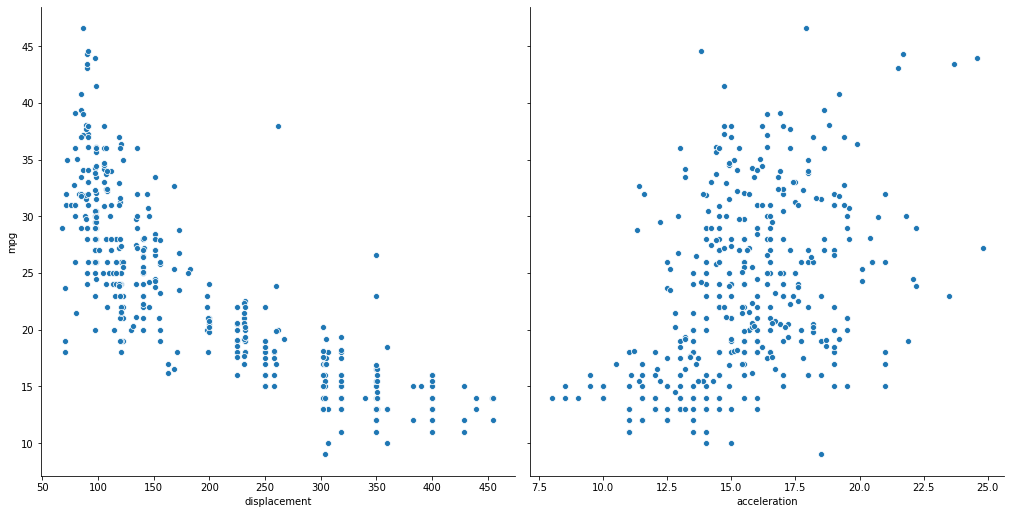

In [17]:
sns.pairplot(df1, x_vars=["displacement","acceleration"], y_vars="mpg", height=7.0)

We got rid of un-helpful variables and finally chose the 2 significant ones.
Right now we are with 2 variable MLR (multiple linear regression).

**y=b0+b1X1+b2X2** <br>
mpg= b0 * 1 + b1 * displacement + b2 * acceleration


In [18]:
# Backward Elimination
import statsmodels.api as sm

# Lets add a column with all values as contant=1 --> coefficient of b0
y=df["mpg"]
X1=sm.add_constant(X)
X1.head()

,const,displacement,acceleration
0,1.0,307.0,12.0
1,1.0,350.0,11.5
2,1.0,318.0,11.0
3,1.0,304.0,12.0
4,1.0,302.0,10.5


In [19]:
# Lets check the 2 variables
regressorOLS=sm.OLS(y,X1).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     358.9
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           4.74e-89
Time:                        03:48:35   Log-Likelihood:                -1156.2
No. Observations:                 392   AIC:                             2318.
Df Residuals:                     389   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.1882      1.922     18.828      0.000      32.409      39.967
displacement    -0.0609      0.003    -22.791      0.000      -0.066      -0.056
acceleration    -0.0582      0.101     -0.575      0.566      -0.257       0.141
==============================================================================
Omnibus:                       43.926   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.179
Skew:                           0.725   Prob(JB):                     1.57e-15
Kurtosis:                       4.440   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The factor **P>[t]** should not be >0.05. If you look above, its value for acceleration=0.566. We need to get rid of this.

Another thing to note here is the warning --> "The condition number is large, 1.82e+03". This means that the correlation is strong.

Lets try again after removing acceleration.

In [20]:
X1=X1.drop(["acceleration"],axis=1)
regressorOLS=sm.OLS(y,X1).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.66e-90
Time:                        03:48:35   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we need to only consider displacement as our independent variable to predict mpg.

In [21]:
# Create train and test dataset
from sklearn.model_selection import train_test_split
X=X.drop(["acceleration"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(313, 1) (79, 1) (313,) (79,)


In [22]:
# Train the model
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [23]:
# Predict y
y_pred=linear_reg.predict(X_test)

In [24]:
# Compare y_pred and y_test
df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df1.head(15)

,Actual,Predicted
146,28.0,29.684689
282,22.3,26.667660
69,12.0,13.996135
378,38.0,28.779580
331,33.8,29.262305
257,19.4,21.116325
310,38.1,29.745030
328,30.0,26.305616
125,20.0,23.167905
108,20.0,29.262305


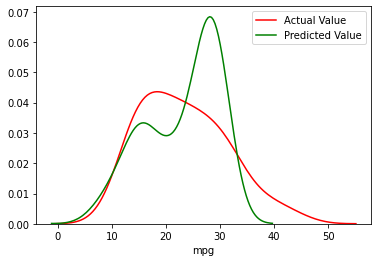

In [25]:
# Distribution plot comparing y_pred and y_test
sns.distplot(y_test,color="r",label="Actual Value",hist=False)
sns.distplot(y_pred,color="g",label="Predicted Value",hist=False)
plt.show()

# Polynomial Regression

In Polynomial Linear Regression, the dependent variable is based on the exponential value of the feature. As seen in the below diagram, its not a line but a curved line which can be shown below.

![my_image](images/8_PLR.png)

Text(0, 0.5, 'fuel efficiency')

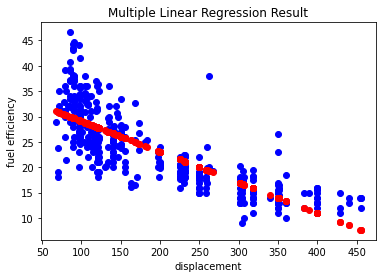

In [26]:
# Scatter plot
plt.scatter(X,y,color="blue")
X1.head(15)
plt.scatter(X,linear_reg.predict(X),color="red")
plt.title("Multiple Linear Regression Result")
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")

If you look at the scattered blue points, it looks more like Polynomial Linear Regression rather than the Straight line we see in red. Lets try with polynomial linear regression.

In [27]:
## Data Preprocessing for Polynomial Linear Regression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
X_poly=poly.fit_transform(X) # This is an array

In [28]:
# Lets look at X_ploy
pd.DataFrame(X_poly).head()

,0,1,2
0,1.0,307.0,94249.0
1,1.0,350.0,122500.0
2,1.0,318.0,101124.0
3,1.0,304.0,92416.0
4,1.0,302.0,91204.0


0 - Constant <br>
1 - displacement variable value <br>
2 - Square of column 1 (displacement) <br>

This is so because the Polynomial Linear Equation is of the form **y = b0+b1* X+b2* X^2**. <br>
In the step  **poly=PolynomialFeatures()** the degree is not specified. Default degree=2. Hence we see columns 0-2.

Now lets try to run the same with degree=3.

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X) # This is an array
pd.DataFrame(X_poly).head()

,0,1,2,3
0,1.0,307.0,94249.0,28934443.0
1,1.0,350.0,122500.0,42875000.0
2,1.0,318.0,101124.0,32157432.0
3,1.0,304.0,92416.0,28094464.0
4,1.0,302.0,91204.0,27543608.0


We can keep going at any degree. Lets stick to degree=2.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
X_poly=poly.fit_transform(X)
pd.DataFrame(X_poly).head()

,0,1,2
0,1.0,307.0,94249.0
1,1.0,350.0,122500.0
2,1.0,318.0,101124.0
3,1.0,304.0,92416.0
4,1.0,302.0,91204.0


In [31]:
# Fit the model
poly.fit(X_poly,y)
lin2=LinearRegression()
lin2.fit(X_poly,y)

LinearRegression()

In [32]:
# y prediction
y_ploy_pred=lin2.predict(X_poly)

In [33]:
# Compare y actual with y poly
df2=pd.DataFrame({"Actual":y,"Predicted":y_ploy_pred})
df2.head(15)

,Actual,Predicted
0,18.0,15.594315
1,15.0,14.426097
2,18.0,15.236148
3,16.0,15.699075
4,17.0,15.770601
5,15.0,13.904085
6,14.0,14.177058
7,14.0,13.998240
8,14.0,14.192359
9,15.0,13.898888


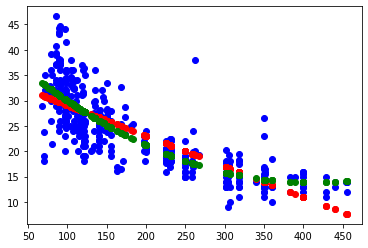

In [34]:
# Scatter plot
plt.scatter(X,y,color="blue")
X1.head(15)
plt.scatter(X,linear_reg.predict(X),color="red")
plt.scatter(X,y_ploy_pred,color="green")
plt.show()

In [36]:
# R2 score comparison
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


print("R2 Score for MLR",r2_score(y,linear_reg.predict(X)))
print("Root mean square for MLR",sqrt(mean_squared_error(y,linear_reg.predict(X))))

print("R2 Score for PLR",r2_score(y,y_ploy_pred))
print("Root mean square for PLR",sqrt(mean_squared_error(y,y_ploy_pred)))

R2 Score for MLR 0.6481521023561414
Root mean square for MLR 4.62376921742559
R2 Score for PLR 0.6888087333238481
Root mean square for PLR 4.348428859091055


R2 has increased for PLR. Hence, PLR is better.

 # KNN
 For theory refer: ./3.1.KNN.ipynb

In [38]:
# KNN Model fit
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=9) # Create an knn object
knn.fit(X_train,y_train) # Fit the model using the training values

KNeighborsRegressor(n_neighbors=9)

In [52]:
# predict
y_pred_knn=knn.predict(X_test)

pandas.core.series.Series

In [42]:
# Visualize
df3=pd.DataFrame({"Actual":y,"Predicted":y_ploy_pred})
df3.head(15)

,Actual,Predicted
0,18.0,15.594315
1,15.0,14.426097
2,18.0,15.236148
3,16.0,15.699075
4,17.0,15.770601
5,15.0,13.904085
6,14.0,14.177058
7,14.0,13.998240
8,14.0,14.192359
9,15.0,13.898888


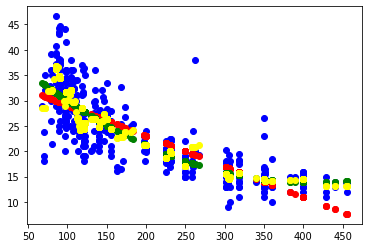

In [43]:
# Scatterplot
plt.scatter(X,y,color="blue")
plt.scatter(X,linear_reg.predict(X),color="red")
plt.scatter(X,y_ploy_pred,color="green")
plt.scatter(X,knn.predict(X),color="yellow")
plt.show()

In [44]:
# Check performance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


print("R2 Score for MLR",r2_score(y,linear_reg.predict(X)))
print("Root mean square for MLR",sqrt(mean_squared_error(y,linear_reg.predict(X))))

print("R2 Score for PLR",r2_score(y,y_ploy_pred))
print("Root mean square for PLR",sqrt(mean_squared_error(y,y_ploy_pred)))

print("R2 Score for KNN",r2_score(y,knn.predict(X)))
print("Root mean square for KNN",sqrt(mean_squared_error(y,knn.predict(X))))

R2 Score for MLR 0.6481521023561414
Root mean square for MLR 4.62376921742559
R2 Score for PLR 0.6888087333238481
Root mean square for PLR 4.348428859091055
R2 Score for KNN 0.7514144992162307
Root mean square for KNN 3.8864811545505065


Both R2 and RMSE has both imprpoved. Hence KNN is better in this case.

In [46]:
# Lets see how KNN works with different values of neighbors. If you see k=9 has the lowest RMSE
for k in range(20):
    k=k+1
    # KNN Model fit
    knn=KNeighborsRegressor(n_neighbors=k) # Create an knn object
    knn.fit(X_train,y_train) # Fit the model using the training values
    y_pred_knn=knn.predict(X_test)
    print("k value:",k,"RMSE",sqrt(mean_squared_error(y,knn.predict(X))))

k value: 1 RMSE 5.863711473537725
k value: 2 RMSE 4.506143765200247
k value: 3 RMSE 3.9426256545802314
k value: 4 RMSE 3.887127787483258
k value: 5 RMSE 3.801504267244422
k value: 6 RMSE 3.844690639931911
k value: 7 RMSE 3.8221869223832647
k value: 8 RMSE 3.8499771711985513
k value: 9 RMSE 3.8864811545505065
k value: 10 RMSE 3.9169932632683704
k value: 11 RMSE 3.929661247356384
k value: 12 RMSE 3.946823895663282
k value: 13 RMSE 3.9475673838721645
k value: 14 RMSE 3.934995327679942
k value: 15 RMSE 3.980581308178544
k value: 16 RMSE 3.9703748255775997
k value: 17 RMSE 3.9743005854746998
k value: 18 RMSE 3.9965454876171616
k value: 19 RMSE 4.013543271806516
k value: 20 RMSE 4.023988773656085


In [47]:
# Plot a graph with the values
rmse=[]
for k in range(20):
    k=k+1
    # KNN Model fit
    knn=KNeighborsRegressor(n_neighbors=k) # Create an knn object
    knn.fit(X_train,y_train) # Fit the model using the training values
    y_pred_knn=knn.predict(X_test)
    rmse.append(sqrt(mean_squared_error(y,knn.predict(X))))
    print("k value:",k,"RMSE",sqrt(mean_squared_error(y,knn.predict(X))))
rmse

k value: 1 RMSE 5.863711473537725
k value: 2 RMSE 4.506143765200247
k value: 3 RMSE 3.9426256545802314
k value: 4 RMSE 3.887127787483258
k value: 5 RMSE 3.801504267244422
k value: 6 RMSE 3.844690639931911
k value: 7 RMSE 3.8221869223832647
k value: 8 RMSE 3.8499771711985513
k value: 9 RMSE 3.8864811545505065
k value: 10 RMSE 3.9169932632683704
k value: 11 RMSE 3.929661247356384
k value: 12 RMSE 3.946823895663282
k value: 13 RMSE 3.9475673838721645
k value: 14 RMSE 3.934995327679942
k value: 15 RMSE 3.980581308178544
k value: 16 RMSE 3.9703748255775997
k value: 17 RMSE 3.9743005854746998
k value: 18 RMSE 3.9965454876171616
k value: 19 RMSE 4.013543271806516
k value: 20 RMSE 4.023988773656085


[5.863711473537725,
 4.506143765200247,
 3.9426256545802314,
 3.887127787483258,
 3.801504267244422,
 3.844690639931911,
 3.8221869223832647,
 3.8499771711985513,
 3.8864811545505065,
 3.9169932632683704,
 3.929661247356384,
 3.946823895663282,
 3.9475673838721645,
 3.934995327679942,
 3.980581308178544,
 3.9703748255775997,
 3.9743005854746998,
 3.9965454876171616,
 4.013543271806516,
 4.023988773656085]

<AxesSubplot:>

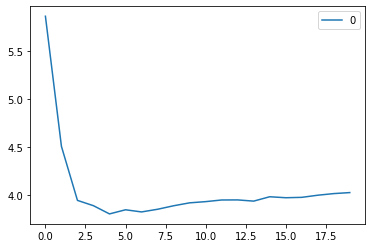

In [50]:
# plot the data
curveplot=pd.DataFrame(rmse)
curveplot.plot()

# IF you see, the value at 9 was least